# Variational Auto Encoders for Cardiac Shape Modeling

## Students
* Alice Valença De Lorenci
* Artur Dandolini Pescador
* Giulia Mannaioli
* Lais Isabelle Alves dos Santos

## Importing Libraries

In [6]:
# !pip install torchio
# !pip install torch
# !pip install torchvision

In [63]:
import os
import nibabel as nib
import preprocessing as pre

In [64]:
# if the .py is changed, run to reload
import importlib
importlib.reload(pre)

<module 'preprocessing' from '/home/alice/GIT/Variational-Auto-Encoders-for-cardiac-shape-modeling/preprocessing.py'>

In [65]:
# Differentiate local paths
user = 'alice'
if user == 'lais':
    dataset_path = '../ACDC/database'
else:
    dataset_path = './ACDC/database'

## Pre-process ACDC dataset

In [66]:

testing_folder = os.path.join(dataset_path, 'testing')
training_folder = os.path.join(dataset_path, 'training')

nb_training = len(os.listdir(training_folder))
nb_testing = len(os.listdir(testing_folder))

# Extracting training images paths
images_train_ED_path, masks_train_ED_path, images_train_ES_path, masks_train_ES_path = pre.preprocess_files_acdc(training_folder, nb_training)

# Extracting testing images paths
images_test_ED_path, masks_test_ED_path, images_test_ES_path, masks_test_ES_path = pre.preprocess_files_acdc(testing_folder, nb_testing, test=True)

In [67]:
print('----------- Training dataset -----------')
print('Number of images ED:\t{}'.format(len(images_train_ED_path)))
print('Number of masks ED:\t{}'.format(len(masks_train_ED_path)))
print('Number of images ES:\t{}'.format(len(images_train_ES_path)))
print('Number of masks ES:\t{}'.format(len(masks_train_ES_path)))

print('\n----------- Testing dataset -----------')
print('Number of images ED:\t{}'.format(len(images_test_ED_path)))
print('Number of masks ED:\t{}'.format(len(masks_test_ED_path)))
print('Number of images ES:\t{}'.format(len(images_test_ES_path)))
print('Number of masks ES:\t{}'.format(len(masks_test_ES_path)))

----------- Training dataset -----------
Number of images ED:	100
Number of masks ED:	100
Number of images ES:	100
Number of masks ES:	100

----------- Testing dataset -----------
Number of images ED:	50
Number of masks ED:	50
Number of images ES:	50
Number of masks ES:	50


In [68]:
if user == 'alice':
    train_data = pre.preprocessingPipeline( masks_train_ED_path[:10] )
else:
    train_data = pre.preprocessingPipeline( masks_train_ED_path ) 

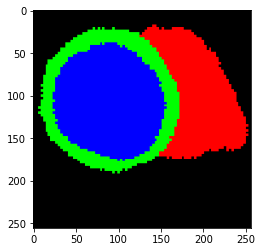

In [69]:
# Show multi-channel mask
idx = 99
pre.visualize_multichannel_mask( np.moveaxis( train_data[2], [0,1,2], [2,0,1] )[:,:,1:] )

# Step-by-step pre-processing

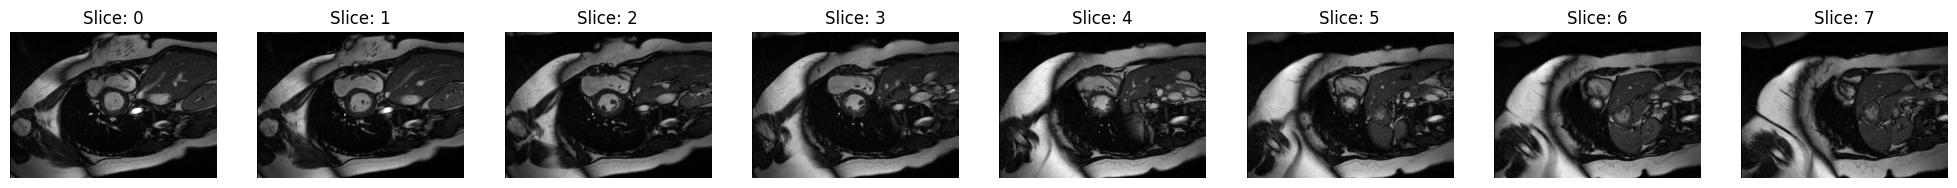

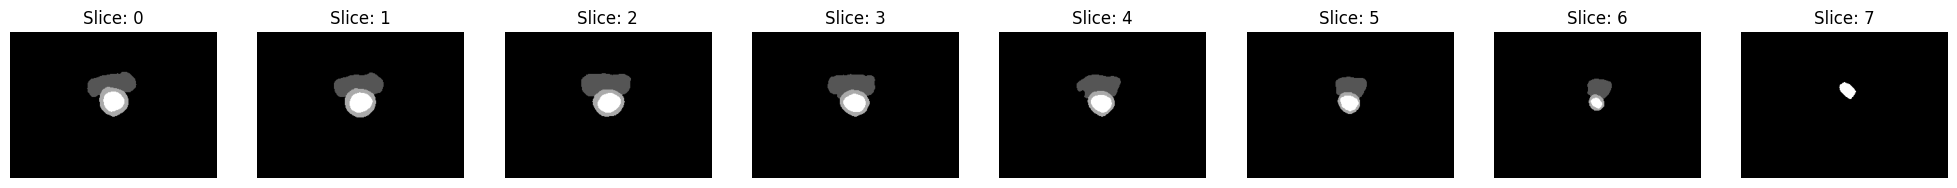

In [12]:
# Show images and masks of training dataset
patient = 99

image = pre.nii_reader(images_train_ED_path[patient])
mask = pre.nii_reader(masks_train_ED_path[patient])

pre.visualize_image_mask(image, mask, image.shape[2])

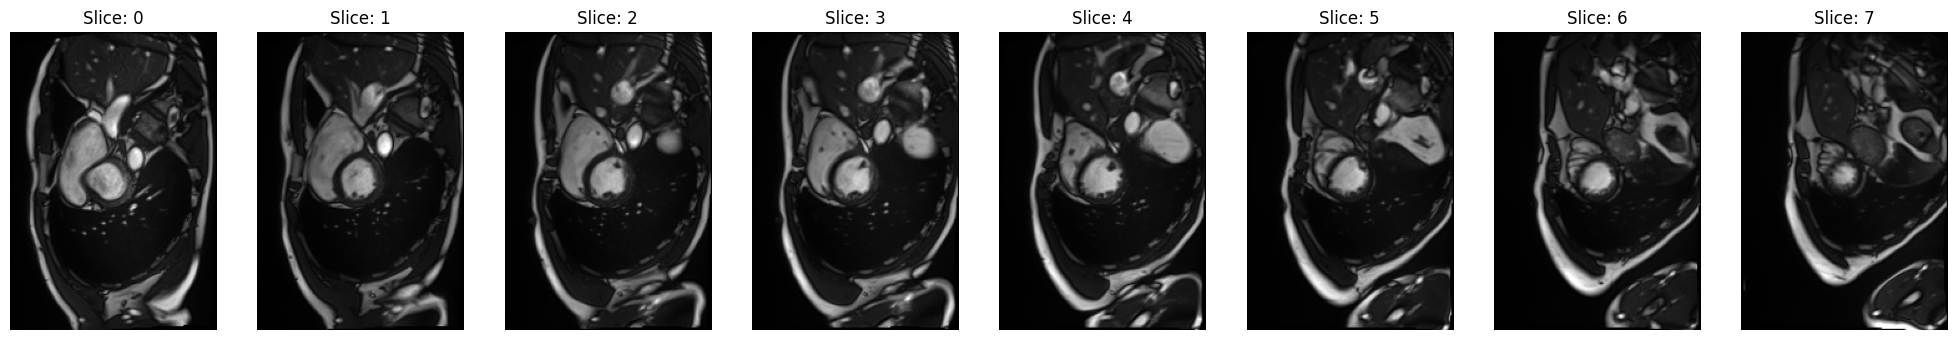

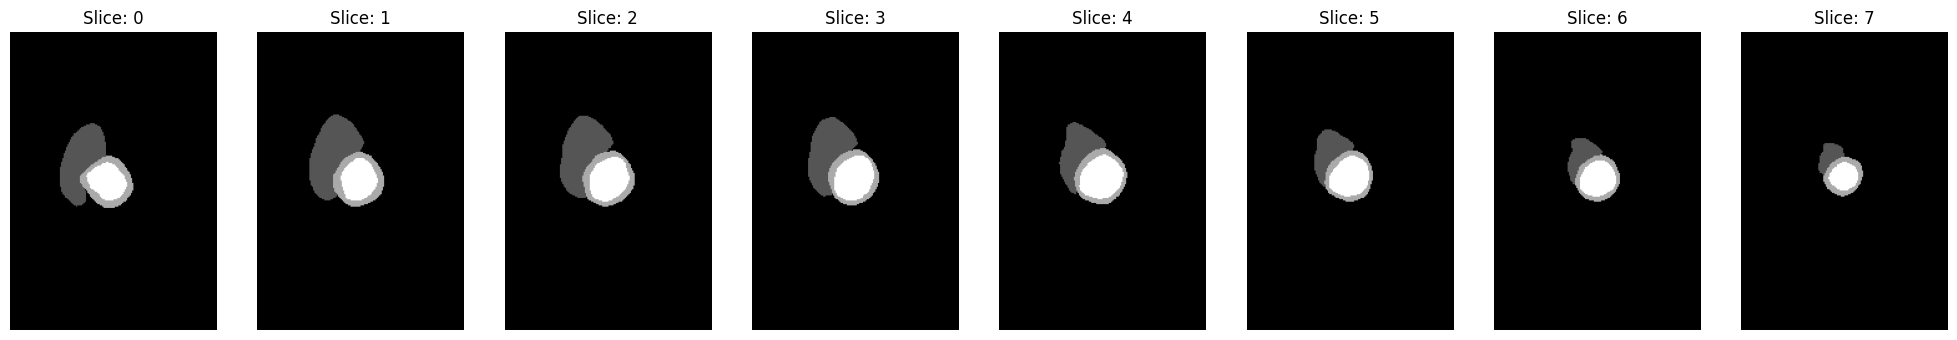

In [13]:
# Show images and masks of testing dataset
patient = 20

image = pre.nii_reader(images_test_ED_path[patient])
mask = pre.nii_reader(masks_test_ED_path[patient])

pre.visualize_image_mask(image, mask, image.shape[2])

In [14]:
# Loading the masks
masks_train_ED = pre.heart_mask_loader(masks_train_ED_path)
masks_train_ES = pre.heart_mask_loader(masks_train_ES_path)
masks_test_ED = pre.heart_mask_loader(masks_test_ED_path)
masks_test_ES = pre.heart_mask_loader(masks_test_ES_path)

In [15]:
# Rotate masks so that the relative position of the LV and RV is always the same
r_masks_train_ED = pre.align_heart_mask(masks_train_ED)
r_masks_train_ES = pre.align_heart_mask(masks_train_ES)
r_masks_test_ED = pre.align_heart_mask(masks_test_ED)
r_masks_test_ES = pre.align_heart_mask(masks_test_ES)

In [16]:
# Freeing memory
del masks_train_ED, masks_train_ES, masks_test_ED, masks_test_ES

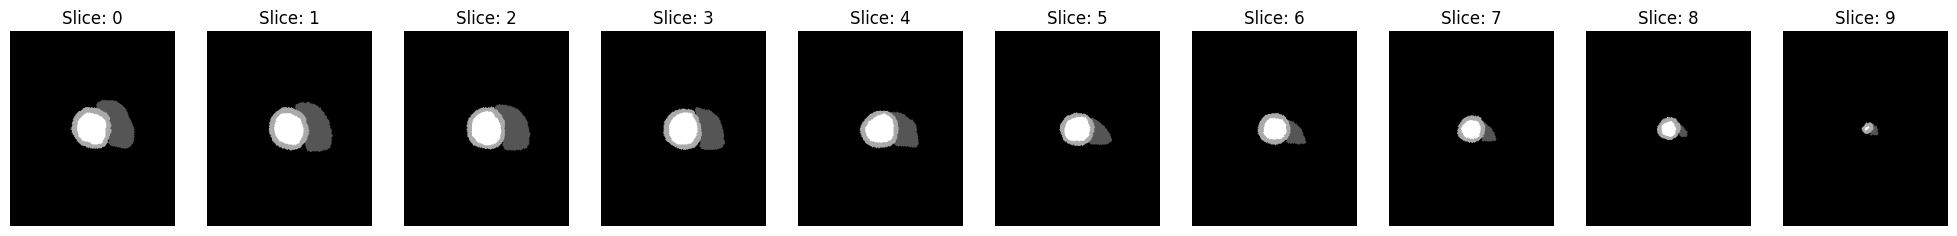

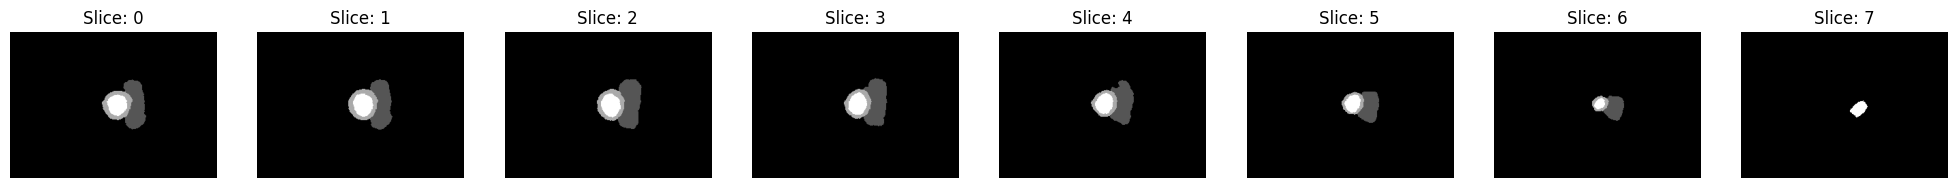

In [17]:
# Show aligned masks
patient = 61
pre.visualize_mask(r_masks_train_ED[patient])

patient = 99
pre.visualize_mask(r_masks_train_ED[patient])

In [18]:
# Crops masks
c_masks_train_ED = pre.crop_heart_mask(r_masks_train_ED)
c_masks_train_ES = pre.crop_heart_mask(r_masks_train_ES)
c_masks_test_ED = pre.crop_heart_mask(r_masks_test_ED)
c_masks_test_ES = pre.crop_heart_mask(r_masks_test_ES)

In [19]:
# Freeing memory
del r_masks_train_ED, r_masks_train_ES, r_masks_test_ED, r_masks_test_ES

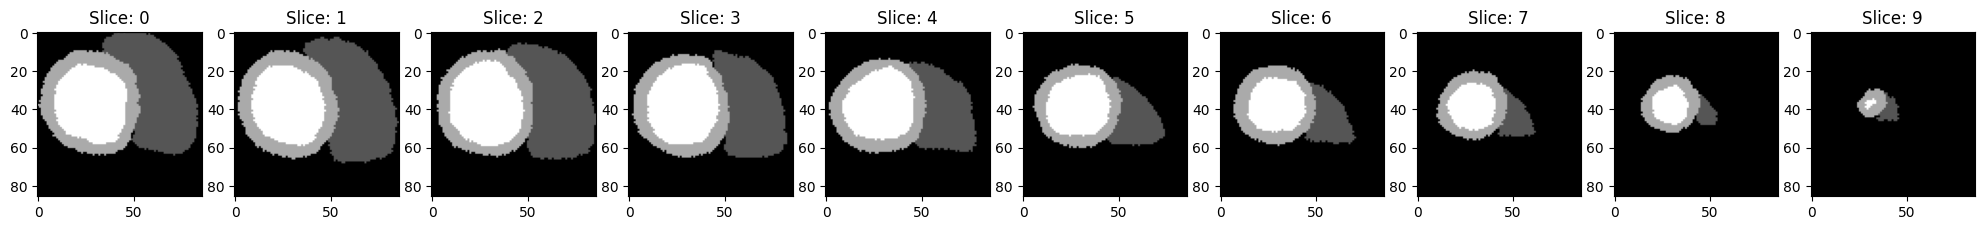

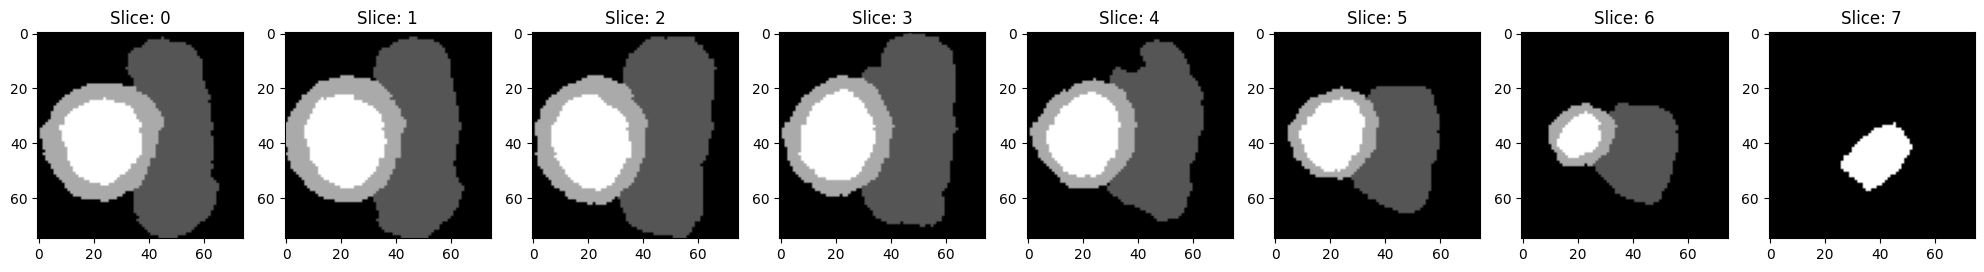

In [20]:
# Show aligned and cropped masks
patient = 61
pre.visualize_mask(c_masks_train_ED[patient], show_axis=True)

patient = 99
pre.visualize_mask(c_masks_train_ED[patient], show_axis=True)

In [21]:
# Standardize image size (inputs of the network must be of same size)
p_masks_train_ED = pre.resize_heart_mask(c_masks_train_ED)
p_masks_train_ES = pre.resize_heart_mask(c_masks_train_ES)
p_masks_test_ED = pre.resize_heart_mask(c_masks_test_ED)
p_masks_test_ES = pre.resize_heart_mask(c_masks_test_ES)

In [22]:
# Freeing memory
del c_masks_train_ED, c_masks_train_ES, c_masks_test_ED, c_masks_test_ES

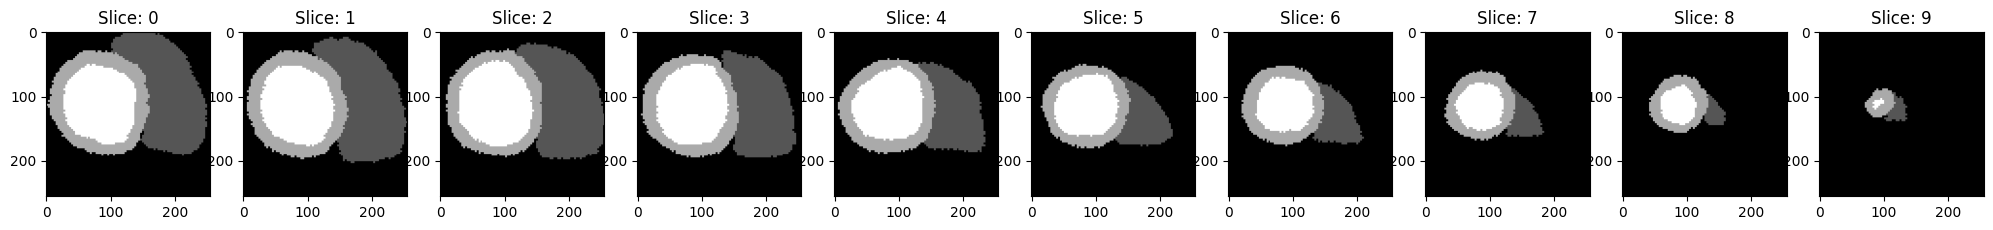

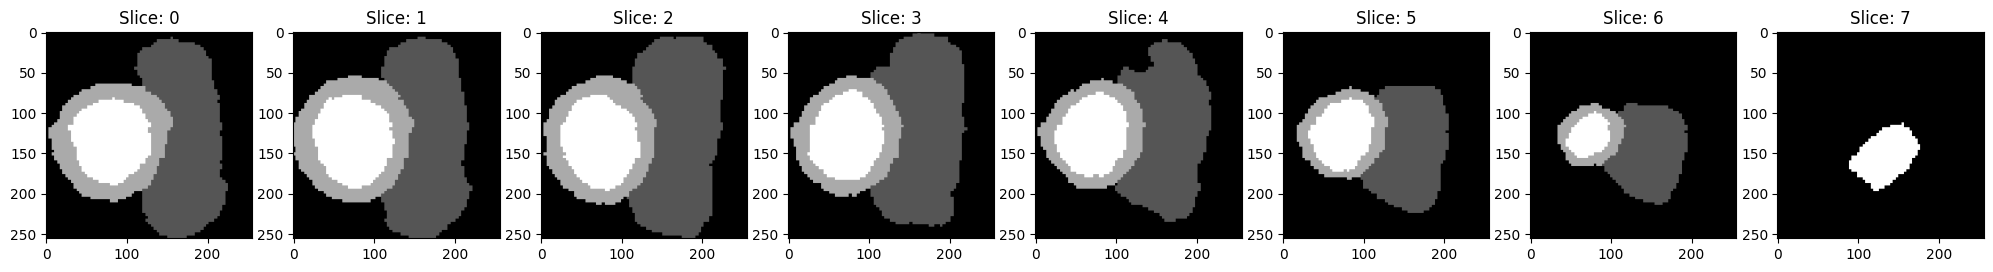

In [23]:
# Show aligned and cropped masks
patient = 61
pre.visualize_mask(p_masks_train_ED[patient], show_axis=True)

patient = 99
pre.visualize_mask(p_masks_train_ED[patient], show_axis=True)

In [24]:
# Separate the frames, each frame will treated as a 2D image
masks_train_ED_2d = pre.convert_3D_to_2D(p_masks_train_ED)
masks_train_ES_2d = pre.convert_3D_to_2D(p_masks_train_ES)
masks_test_ED_2d = pre.convert_3D_to_2D(p_masks_test_ED)
masks_test_ES_2d = pre.convert_3D_to_2D(p_masks_test_ES)

In [25]:
# Freeing memory
del p_masks_train_ED, p_masks_train_ES, p_masks_test_ED, p_masks_test_ES

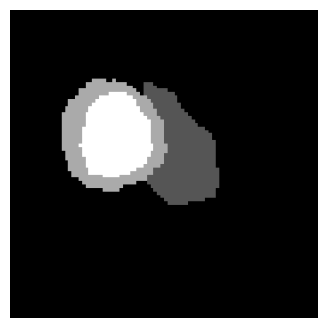

In [26]:
# Show 2D mask
idx = 99
pre.visualize_2d_mask(masks_train_ED_2d[idx])

In [27]:
# Translate multilabel mask into multi channel mask (each channel represents a different structure)
masks_train_ED_channels = pre.heart_mask_extraction(masks_train_ED_2d)
masks_train_ES_channels = pre.heart_mask_extraction(masks_train_ES_2d)
masks_test_ED_channels = pre.heart_mask_extraction(masks_test_ED_2d)
masks_test_ES_channels = pre.heart_mask_extraction(masks_test_ES_2d)

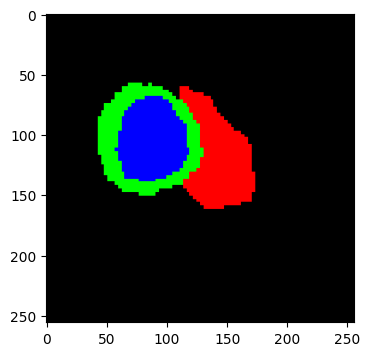

In [28]:
# Show multi-channel mask
idx = 99
pre.visualize_multichannel_mask( np.moveaxis( masks_train_ED_channels[idx], [0,1,2], [2,0,1] )[:,:,1:] )

In [29]:
pre.saveDataset(masks_train_ED_channels, './', 'masks_train_ED_channels')
pre.saveDataset(masks_train_ES_channels, './', 'masks_train_ES_channels')
pre.saveDataset(masks_test_ED_channels, './', 'masks_test_ED_channels')
pre.saveDataset(masks_test_ES_channels, './', 'masks_test_ES_channels')

In [30]:
masks_train_ED_channels = pre.loadDataset('./', 'masks_train_ED_channels')
masks_train_ES_channels = pre.loadDataset('./', 'masks_train_ES_channels')
masks_test_ED_channels = pre.loadDataset('./', 'masks_test_ED_channels')
masks_test_ES_channels = pre.loadDataset('./', 'masks_test_ES_channels')

In [31]:
# Prepare dataset - instances of subjects dataset
subjects_train_ED_channels = pre.transform_data_subjects(masks_train_ED_channels)
subjects_train_ES_channels = pre.transform_data_subjects(masks_train_ES_channels)
subjects_test_ED_channels = pre.transform_data_subjects(masks_test_ED_channels)
subjects_test_ES_channels = pre.transform_data_subjects(masks_test_ES_channels)


In [32]:
# Freeing memory
del masks_train_ED_channels, masks_train_ES_channels, masks_test_ED_channels, masks_test_ES_channels

## Train the model

In [70]:
import numpy as np
from PIL import Image
import torch
from torchvision import transforms
import model as m

In [89]:
# if the .py is changed, run to reload
import importlib
importlib.reload(m)

<module 'model' from '/home/alice/GIT/Variational-Auto-Encoders-for-cardiac-shape-modeling/model.py'>

In [90]:
# Define the dimensions of the input and latent space
x_dim = 4  # Number of input channels (e.g., RGB image)
# Create an instance of the VAE model
model = m.VAE(256, 256, x_dim)

In [91]:
batch_size = 32
num_epochs = 10
learning_rate = 1e-3

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

In [92]:
optimizer = m.optim.Adam(model.parameters(), lr=learning_rate)

In [93]:
def train_vae(vae_model,optimizer,data_train_loader,epoch):
  train_loss = 0
  for batch_idx, data in enumerate(data_train_loader):
    optimizer.zero_grad()

    y, z_mu, z_log_var = vae_model.forward(data) # FILL IN CODE HERE
    loss_vae = vae_model.loss_function(data, y, z_mu, z_log_var) # FILL IN CODE HERE
    loss_vae.backward()
    train_loss += loss_vae.item()
    vae_optimizer.step() 
		
    if batch_idx % 100 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
      epoch, batch_idx * len(data), len(data_train_loader.dataset),
      100. * batch_idx / len(data_train_loader), loss_vae.item() / len(data)))
  print('====> Epoch: {} Average loss: {:.4f}'.format(epoch, train_loss / len(data_train_loader.dataset)))

In [94]:
train_vae(model, optimizer, train_loader, epoch=0)

torch.Size([32, 1, 125, 125])
torch.Size([32, 15625])


AttributeError: 'VAE' object has no attribute 'sampling'